## News Articules Analysis of Boris Johnson Chrismas Party Scandal 

In this section at least 50 news articules was extracted on the subject matter aforementioned, below are the following task that would be carried out on the articules:

1. Data Collection From News Api
2. Data Cleaning and Text Preprocessing 
3. Exploratory Data Analysis
4. Topic Modelling 
5. Articule Summarization 

## Data Collection From News Api

In [1]:
#import necessary libraries 
import pandas as pd 
from newsapi import NewsApiClient as nc
import datetime as dt
import json
import requests

In [165]:
#extract the articles using Rapid Api 
url = "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/search/NewsSearchAPI"

querystring = {"q":"Boris Johnsons "  + 'Downing Str' ,
               "pageNumber":"5","pageSize":"100",
               "autoCorrect":"true",
               "fromPublishedDate":"2021-12-01",
               "toPublishedDate":"2021-12-27"
               }

headers = {
    'x-rapidapi-key': "7b12b85a6emsh339262aa230ba99p12a182jsn856711fbb364",
    'x-rapidapi-host': "contextualwebsearch-websearch-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

#print(response.text)



In [365]:
print(response.text)

{"_type":"news","didUMean":"","totalCount":973,"relatedSearch":[],"value":[{"id":"2150354836085691914","title":"Boris Johnson is the problem not the solution as Covid crisis escalates Andrew Vine","url":"https://www.yorkshirepost.co.uk/news/opinion/columnists/boris-johnson-is-the-problem-not-the-solution-as-covid-crisis-escalates-andrew-vine-3492910","description":"I WATCHED Boris Johnsons Sunday evening announcement of the drive to give every adult a booster vaccination by the end of this month with mixed emotions.","body":"Sorry, there seem to be some issues. Please try again later.\nSubmitting...\nThis site is protected by reCAPTCHA and the Google Privacy Policyand Terms of Serviceapply.\nAnd yet another part of me found it difficult to accept for the simple reason that it has become all but impossible to believe anything the Prime Minister  says.\nPrime Minister Boris Johnson, gestures as he records an address to the nation at Downing Street, London, to provide an update on the boo

In [166]:
# Convert the response to JSON format and pretty print it
response_json = response.json()

my_list_of_dicts = response_json['value']

#writing them to a text file
with open('news.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

#creating data frame from txt files
my_demo_list = []
with open('news.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        article = each_dictionary['body']
        date= each_dictionary['datePublished']
        news_sources= each_dictionary['provider']
        sources = news_sources['name']
        source = sources

        my_demo_list.append({'date': date,
                             'article': str(article),
                             'source': source,
                            })

        

tweet_json = pd.DataFrame(my_demo_list, columns = ['date', 'article','source'])


In [170]:
#display the first five row 
tweet_json.tail(10)

,date,article,source
40,2021-12-12T16:00:00,"Mon, Dec 13, 2021 page6\nCOVID-19: Quiz photog...",taipeitimes
41,2021-12-12T15:41:25,"Sorry, there seem to be some issues. Please tr...",yorkshirepost
42,2021-12-12T15:27:29,Find your bookmarks in your Independent Premiu...,independent
43,2021-12-12T15:08:44,Prince Harry's latest 'political' move highlig...,dailystar
44,2021-12-12T14:30:58,\nB\noris Johnson appears to have broken Covid...,exbulletin
45,2021-12-12T14:30:00,"London, Dec 12 (PTI) British Prime Minister Bo...",republicworld
46,2021-12-12T13:25:47,", registeror subscribeto save articles for lat...",theage
47,2021-12-12T12:51:15,Google News\nBoris Johnson on Sunday faced fre...,news18
48,2021-12-12T12:24:12,Keir Starmer: PM appears to have broken the la...,newschainonline
49,2021-12-12T12:17:08,"NewsDesk\n\nIn the photo, Johnson is photograp...",exbulletin


In [91]:
tweet_json.to_csv('nws.csv')

In [95]:
art = tweet_json.copy ()

## Data Cleaning and Text Preprocessing 

## Data Cleaning

This section contain the cleaning of the articules corpus

In [99]:
# Define a Function that will Clean the Tweets 
import re
'''
input: data containing tweet to be cleaned 
output: cleaned text data

'''
def clean_art (tweet):
    tweet = str(tweet).lower()
    #tweet = re.sub(r'https?:/\/\S+|www\.\S+','', tweet) #remove url
    #tweet = re.sub(r'\B#\S+','',tweet)#remove hastags
    tweet = re.sub('@[^\s]+','',tweet)#remove @mentions
    tweet = re.sub(r'\s+[a-zA-Z0-9]\s+','',tweet)# remove single statement
    tweet = re.sub('rt','', tweet)#remove retweets
    tweet = re.sub('\(.*?\)', '', tweet) #remove text in circle brackets
    tweet = re.sub('<.*?>+', '', tweet) 
    tweet = re.sub(r"\d+", "", tweet)#remove number 
    tweet = re.sub(r'[^\w\s]','',tweet)#remove punctuation 
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I) #remove double space 
    return (tweet)

In [101]:
#apply the cleaning function to the article column
art['cl_art'] = art['article'].apply(lambda x: clean_art(x))

In [103]:
art.head()# display the first row 

,date,article,source,cl_art
0,2021-12-14T05:55:10,"Sorry, there seem to be some issues. Please tr...",yorkshirepost,sorry there seem to be some issues please try ...
1,2021-12-14T00:52:06,NewsDesk\n\nBoris Johnson has claimed he did n...,exbulletin,newsdesk boris johnson has claimed he did not ...
2,2021-12-13T21:40:19,Mr Johnson will be investigated by a top offic...,mirror,mr johnson will be investigated bytop official...
3,2021-12-13T20:55:00,"Comment\nAs MPs are spooked by omicron, Boris ...",telegraph,comment as mps are spooked by omicron boris jo...
4,2021-12-13T17:08:14,"Image caption,\nDavid Eales died alone at Hill...",bbc,image caption david eales died alone at hillin...


In [105]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     50 non-null     object
 1   article  50 non-null     object
 2   source   50 non-null     object
 3   cl_art   50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


## Text Preprocessing 

In [106]:
#import important library for preprocessing
import gensim as gm
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer,SnowballStemmer

In [295]:
def preprocessed_art (data):
    '''
    input = list of articules
    purpose = preprocess articules by (process list articules to word (where word >3),removing stopwords,lemmatize)
    output = processed words
    '''
    #intiate lemmatization
    lemma = WordNetLemmatizer ()
    
    #set stemmer to english 
    #stemmer = SnowballStemmer('english')
    
    #preprocess the list of articules and remove words < 3
    process_art = simple_preprocess(data,min_len=4)
        
    #remove stopwords
    stp_art = [x for x in process_art if x not in STOPWORDS]
        
    #lemmatize and stemming to reduce the inflectional forms of each word into a common base or root
    lemm_art = [lemma.lemmatize(x,pos = 'v') for x in stp_art ]
            
    return (lemm_art)

In [296]:
#create a new column for preprocessed.
art['clt'] = art['cl_art'].apply(preprocessed_art)

In [297]:
art.tail()

,date,article,source,cl_art,clt,num_wrd,pdate,clt2
45,2021-12-13T17:08:14,"Image caption,\nDavid Eales died alone at Hill...",bbc,image caption david eales died alone at hillin...,"[image, caption, david, eales, die, alone, hil...",1595,2021-12-13 17:08:14,"[i, m, a, g, e, , c, a, p, t, i, o, n, , d, ..."
46,2021-12-13T20:55:00,"Comment\nAs MPs are spooked by omicron, Boris ...",telegraph,comment as mps are spooked by omicron boris jo...,"[comment, spook, omicron, boris, johnson, soci...",2928,2021-12-13 20:55:00,"[c, o, m, m, e, n, t, , a, s, , m, p, s, , ..."
47,2021-12-13T21:40:19,Mr Johnson will be investigated by a top offic...,mirror,mr johnson will be investigated bytop official...,"[johnson, will, investigate, bytop, official, ...",1937,2021-12-13 21:40:19,"[m, r, , j, o, h, n, s, o, n, , w, i, l, l, ..."
48,2021-12-14T00:52:06,NewsDesk\n\nBoris Johnson has claimed he did n...,exbulletin,newsdesk boris johnson has claimed he did not ...,"[newsdesk, boris, johnson, claim, break, covid...",3071,2021-12-14 00:52:06,"[n, e, w, s, d, e, s, k, , b, o, r, i, s, , ..."
49,2021-12-14T05:55:10,"Sorry, there seem to be some issues. Please tr...",yorkshirepost,sorry there seem to be some issues please try ...,"[sorry, seem, issue, please, later, submit, si...",4977,2021-12-14 05:55:10,"[s, o, r, r, y, , t, h, e, r, e, , s, e, e, ..."


In [110]:
art.to_csv('nws2.csv')

## Exploratory Data Analysis

The section contain the following:

- Frequency distribution of words
- Wordsclouds for frequent words in the articules
- Time distribution of words

In [132]:
#important libraries 
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set_style('darkgrid')
%matplotlib inline 
#Advance graphics
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
plt.rc('figure',figsize=(17,13))

In [116]:
art.columns

Index(['date', 'article', 'source', 'cl_art', 'clt'], dtype='object')

In [118]:
from collections import Counter #this library was used for counting the common words

#Most Common Words in the Articules using counter function in collection library 
top = Counter([word for sublist in art['clt'] for word in sublist])
#convert to dataFrame 
topwrd_art = pd.DataFrame(top.most_common(50))
#rename the columns 
topwrd_art.columns = ['Common_words','count']
#display the table using colored background 
topwrd_art.style.background_gradient(cmap='Reds')

,Common_words,count
0,say,213
1,johnson,209
2,pay,196
3,minister,170
4,street,150
5,prime,149
6,quiz,148
7,down,143
8,boris,128
9,rule,118


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

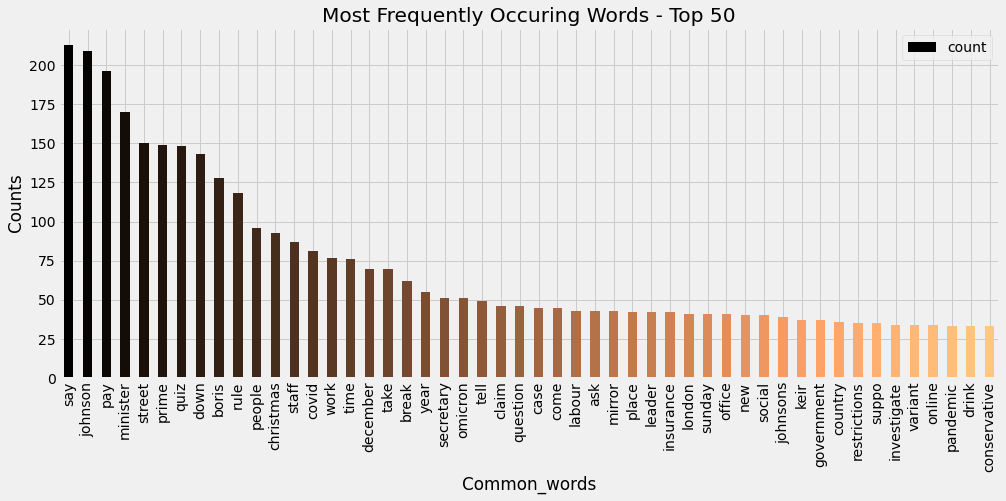

In [119]:
#Graphical Representation of the Frequecy distribution of fist 50 words 
plt.style.use('fivethirtyeight')
color = plt.cm.copper(np.linspace(0, 1, 50))
topwrd_art.plot(x='Common_words', y='count', kind='bar', figsize=(15, 6), color = color)
plt.ylabel('Counts')
plt.title("Most Frequently Occuring Words - Top 50")

In [126]:
topwrd_art1 = topwrd_art.sort_values(by = 'count',ascending = True)

In [130]:
fig = px.bar(topwrd_art1, x="count", y="Common_words", title='Most Frequently Words in Articles - Top 50', orientation='h', 
             width=700, height=700,color='count', color_continuous_scale='Rainbow')
fig.show()

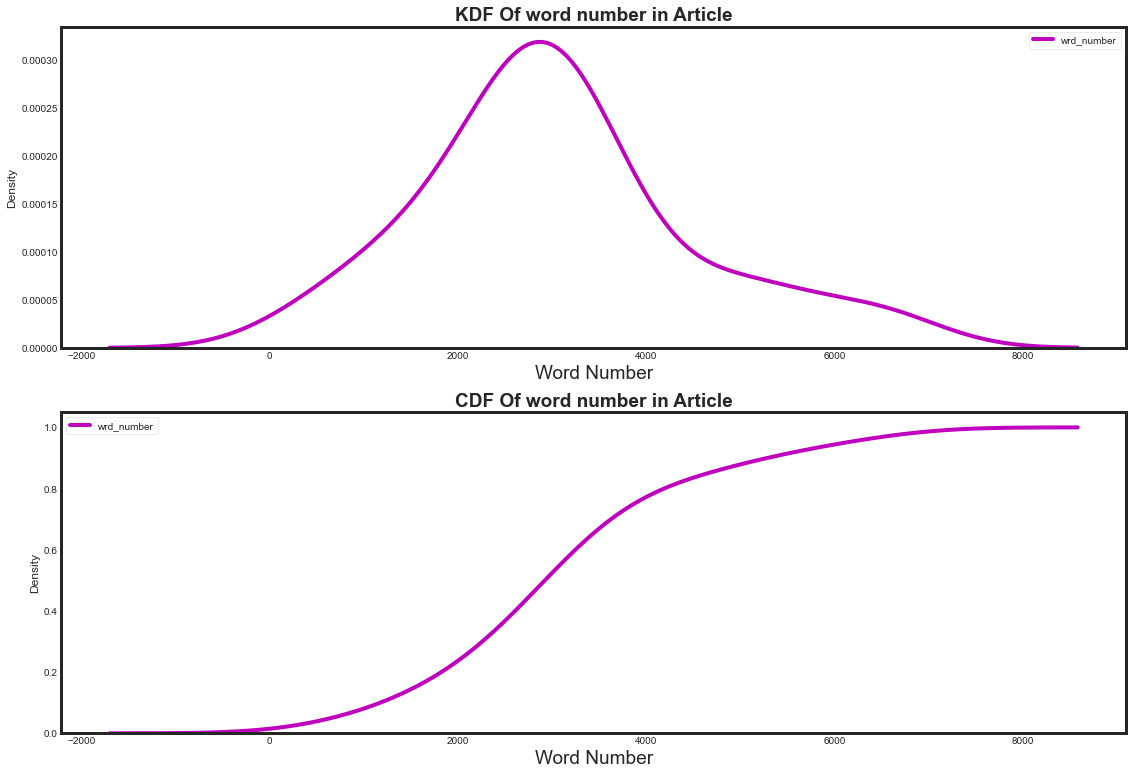

In [134]:
#Probability Densitity Distribution of the words lenght
sns.set_style('white')
art["num_wrd"] = art["cl_art"].apply(lambda x: len(x))
plt.subplot(2,1,1)
plt.title('KDF Of word number in Article',fontsize=19,fontweight='bold')
sns.kdeplot(art['num_wrd'],color = 'm')
plt.xlabel('Word Number',fontsize=19)
plt.legend (labels = ['wrd_number'])
plt.subplot(2,1,2)
plt.title('CDF Of word number in Article',fontsize=19,fontweight='bold')
sns.kdeplot(art['num_wrd'],color = 'm', cumulative = True)
plt.xlabel('Word Number',fontsize=19)
plt.legend (labels = ['wrd_number'])

In [135]:
art.columns

Index(['date', 'article', 'source', 'cl_art', 'clt', 'num_wrd'], dtype='object')

## Word cloud

Text(0.5, 1.0, 'Vocabulary from Articles')

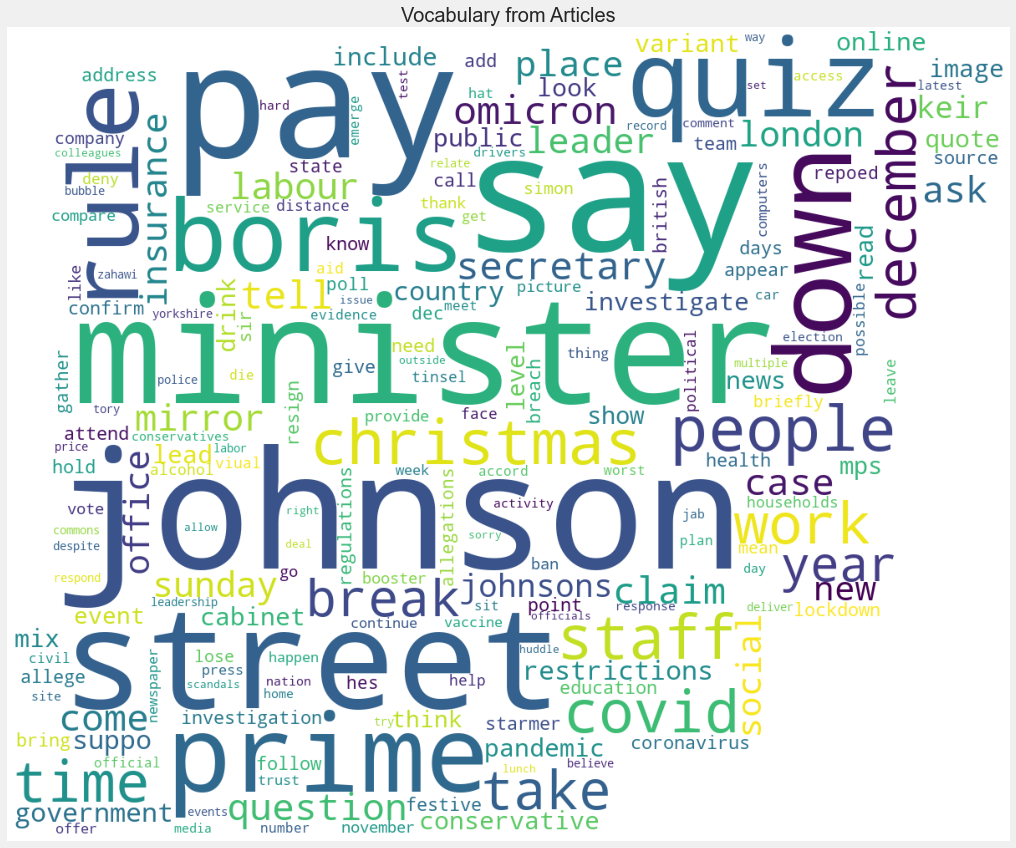

In [154]:
#Graphical representation using wordcloud 
from wordcloud import WordCloud
from PIL import Image
import numpy as np
pos = np.array(Image.open('twitter_mask.png'))
wrd_cloud = WordCloud(background_color = 'white',mask = pos, max_words=200).generate_from_frequencies(dict(top))

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title('Vocabulary from Articles', fontsize = 20)

## Time Distribution 


In [159]:
#inspect the information of the data
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     50 non-null     object        
 1   article  50 non-null     object        
 2   source   50 non-null     object        
 3   cl_art   50 non-null     object        
 4   clt      50 non-null     object        
 5   num_wrd  50 non-null     int64         
 6   pdate    50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.9+ KB


In [158]:
#parse date column into datetime 
art['pdate'] = pd.to_datetime(art['date'])

In [183]:
#create a data frame from the data set
tim = art['source']
#make pdate the index 
tim.index = art['pdate']

In [211]:
#hourly publishly 
perh = tim.resample('60min').count ()
#rename the column
perh = perh.rename({'source':'count'},axis=1)
#pass into dataframe and reset
perh = pd.DataFrame(perh).reset_index()

In [227]:
#Daily publishly 
perd = tim.resample('D').count ()
#rename the column
perd = perd.rename({'source':'count'},axis=1)
#pass into dataframe and reset
perd = pd.DataFrame(perd).reset_index()

In [219]:
#plot per hour 
fig = go.Figure(go.Scatter(x= perh['pdate'],
                          y=perh['source'],
                          mode ='markers+lines',
                          name ="Submissions",
                          marker_color = 'red'))
fig.update_layout(
    title_text = 'PerHour Distribution of Article:({} - {})'.format(art['pdate'][0].strftime("%d/%m/%Y %H:%M:%S"),
                                                       art['pdate'][49].strftime("%d/%m/%Y %H:%M:%S")),template="plotly_",
    title_x=0.5)
fig.show ()

In [230]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Hourly Distribution',  'Daily Distribution'))

fig.add_trace(
    go.Scatter(x= perh['pdate'],
                          y=perh['source'],
                          mode ='markers+lines',
                          name ="hourly",
                          marker_color = 'red'),row = 1, col=1)

fig.add_trace(
    go.Scatter(x=perd['pdate'], 
               y=perd['source'],
               mode ='markers+lines',
               name='daily',
               marker_color = 'blue'),
    row=2, col=1
)
fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(
    title_text = 'PerHour Distribution of Article:({} - {})'.format(art['pdate'][0].strftime("%d/%m/%Y %H:%M:%S"),
                                                       art['pdate'][49].strftime("%d/%m/%Y %H:%M:%S")),template="plotly",
    title_x=0.5)
fig.show()

## Topic Modelling 


In [231]:
#important Library 
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [232]:
# LDA library
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel

In [299]:
# extract the clean article
dt = art['clt']
#display few rows 
dt[:20]

0     [newsdesk, photo, johnson, photograph, onscree...
1     [keir, starmer, appear, break, take, festive, ...
2     [google, news, boris, johnson, sunday, face, f...
3     [registeror, subscribeto, save, aicles, later,...
4     [london, british, prime, minister, boris, john...
5     [oris, johnson, appear, break, covid, laws, la...
6     [prince, harry, latest, political, move, highl...
7     [find, bookmarks, independent, premiumsection,...
8     [sorry, seem, issue, please, later, submit, si...
9     [page, covid, quiz, photograph, woes, down, st...
10    [privacy, notice, rumour, christmas, pay, down...
11    [boris, johnson, address, nation, hannah, smit...
12    [come, covid, level, raise, tothis, even, prim...
13    [newsdesk, former, tory, claim, boris, johnson...
14    [sunday, december, time, douglas, ross, insist...
15    [sorry, seem, issue, please, later, submit, si...
16    [politics, weak, furious, starmer, wish, snap,...
17    [december, update, december, prime, minist

In [300]:
#convert 
dictn = Dictionary(dt)
#filter the frequency 
dictn.filter_extremes(no_below=5, no_above=0.7, keep_n=100000)
#convert words to bag of word format
art_term = [dictn.doc2bow(x) for x in dt]

In [316]:
#The First Model Where Topic = 10 
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=art_term, id2word=dictn, num_topics=10, random_state=150,
                chunksize=1000, passes=150,iterations=150)

In [317]:
#print the lda model 
lda_model.print_topics(num_words=10)

[(0,
  '0.053*"quiz" + 0.023*"break" + 0.023*"staff" + 0.018*"claim" + 0.016*"breach" + 0.015*"investigate" + 0.015*"year" + 0.015*"work" + 0.014*"mirror" + 0.014*"pay"'),
 (1,
  '0.036*"yorkshire" + 0.036*"trust" + 0.032*"site" + 0.030*"sorry" + 0.028*"access" + 0.023*"issue" + 0.022*"term" + 0.022*"later" + 0.020*"seem" + 0.020*"policyand"'),
 (2,
  '0.029*"quiz" + 0.025*"staff" + 0.021*"work" + 0.021*"people" + 0.019*"take" + 0.017*"office" + 0.015*"december" + 0.014*"time" + 0.013*"secretary" + 0.012*"case"'),
 (3,
  '0.015*"another" + 0.015*"time" + 0.015*"come" + 0.015*"point" + 0.013*"lockdown" + 0.013*"nation" + 0.012*"will" + 0.012*"address" + 0.011*"show" + 0.011*"order"'),
 (4,
  '0.023*"pay" + 0.017*"take" + 0.014*"people" + 0.013*"leader" + 0.013*"time" + 0.012*"country" + 0.012*"conservative" + 0.011*"labour" + 0.010*"despite" + 0.010*"lead"'),
 (5,
  '0.028*"online" + 0.023*"will" + 0.019*"company" + 0.018*"quiz" + 0.017*"break" + 0.015*"compare" + 0.011*"multiple" + 0.0

In [318]:
#Model Coherence n Perplexicity for Topic = 10
ch_model = CoherenceModel(model = lda_model,corpus=art_term, texts=dt)

print(f'Coherence_score: {ch_model.get_coherence()}')
#perplexicity
print('\nPerplexity: ', lda_model.log_perplexity(art_term,total_docs=10000))  # a measure of how good the model is. lower the better.


Coherence_score: 0.4445145641003062

Perplexity:  -5.614252124376487


In [313]:
# Model Where Topic = 8
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model2 = LDA(corpus=art_term, id2word=dictn, num_topics=8, random_state=150,
                chunksize=1000, passes=150,iterations=150)

In [314]:
#print the lda model 
lda_model2.print_topics(num_words=10)

[(0,
  '0.051*"quiz" + 0.021*"staff" + 0.019*"break" + 0.017*"investigate" + 0.014*"work" + 0.014*"year" + 0.014*"breach" + 0.013*"pay" + 0.013*"secretary" + 0.013*"mirror"'),
 (1,
  '0.035*"yorkshire" + 0.035*"trust" + 0.031*"site" + 0.027*"access" + 0.027*"sorry" + 0.025*"people" + 0.023*"will" + 0.021*"term" + 0.021*"issue" + 0.020*"later"'),
 (2,
  '0.024*"people" + 0.020*"staff" + 0.020*"take" + 0.019*"work" + 0.017*"quiz" + 0.017*"office" + 0.015*"time" + 0.013*"place" + 0.013*"december" + 0.013*"government"'),
 (3,
  '0.034*"will" + 0.018*"even" + 0.015*"time" + 0.014*"conservative" + 0.013*"johnsons" + 0.012*"make" + 0.011*"go" + 0.010*"public" + 0.010*"question" + 0.010*"omicron"'),
 (4,
  '0.024*"pay" + 0.013*"leader" + 0.013*"resign" + 0.012*"labour" + 0.012*"conservative" + 0.011*"news" + 0.010*"lead" + 0.010*"stratton" + 0.010*"media" + 0.010*"government"'),
 (5,
  '0.030*"quiz" + 0.021*"break" + 0.019*"online" + 0.019*"will" + 0.013*"work" + 0.013*"company" + 0.012*"decem

In [315]:
#Model Coherence n Perplexicity for Topic = 8
ch_model = CoherenceModel(model = lda_model2,corpus=art_term, texts=dt)

print(f'Coherence_score: {ch_model.get_coherence()}')
#perplexicity
print('\nPerplexity: ', lda_model2.log_perplexity(art_term,total_docs=10000))  # a measure of how good the model is. lower the better.


Coherence_score: 0.49489148763412794

Perplexity:  -5.628356818478837


In [377]:
# Model Where Topic = 5 
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model3 = LDA(corpus=art_term, id2word=dictn, num_topics=4, random_state=150,
                chunksize=1000, passes=150,iterations=150)

In [378]:
#print the lda model 
lda_model3.print_topics(num_words=10)

[(0,
  '0.031*"quiz" + 0.019*"staff" + 0.017*"work" + 0.016*"take" + 0.014*"people" + 0.013*"pay" + 0.012*"time" + 0.012*"mirror" + 0.011*"leader" + 0.011*"year"'),
 (1,
  '0.031*"online" + 0.020*"company" + 0.019*"will" + 0.018*"access" + 0.018*"site" + 0.017*"compare" + 0.016*"yorkshire" + 0.016*"trust" + 0.015*"multiple" + 0.014*"offer"'),
 (2,
  '0.032*"quiz" + 0.017*"break" + 0.016*"december" + 0.015*"staff" + 0.015*"work" + 0.012*"claim" + 0.012*"will" + 0.012*"secretary" + 0.011*"look" + 0.011*"case"'),
 (3,
  '0.025*"will" + 0.018*"omicron" + 0.014*"people" + 0.013*"even" + 0.011*"variant" + 0.010*"johnsons" + 0.010*"conservative" + 0.009*"time" + 0.009*"restrictions" + 0.009*"take"')]

In [379]:
ch_model = CoherenceModel(model = lda_model3,corpus=art_term, texts=dt)

print(f'Coherence_score: {ch_model.get_coherence()}')
#perplexicity
print('\nPerplexity: ', lda_model3.log_perplexity(art_term,total_docs=10000))  # a measure of how good the model is. lower the better.


Coherence_score: 0.503485820117725

Perplexity:  -5.692273425755098


In [374]:
# function of optimal number topic 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictn,
                                               random_state=150,chunksize=1000, passes=150, iterations=150)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictn, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [375]:
model_list, coherence_values = compute_coherence_values(dictionary=dictn, corpus=art_term, texts=dt, start=2, limit=10, step=1)

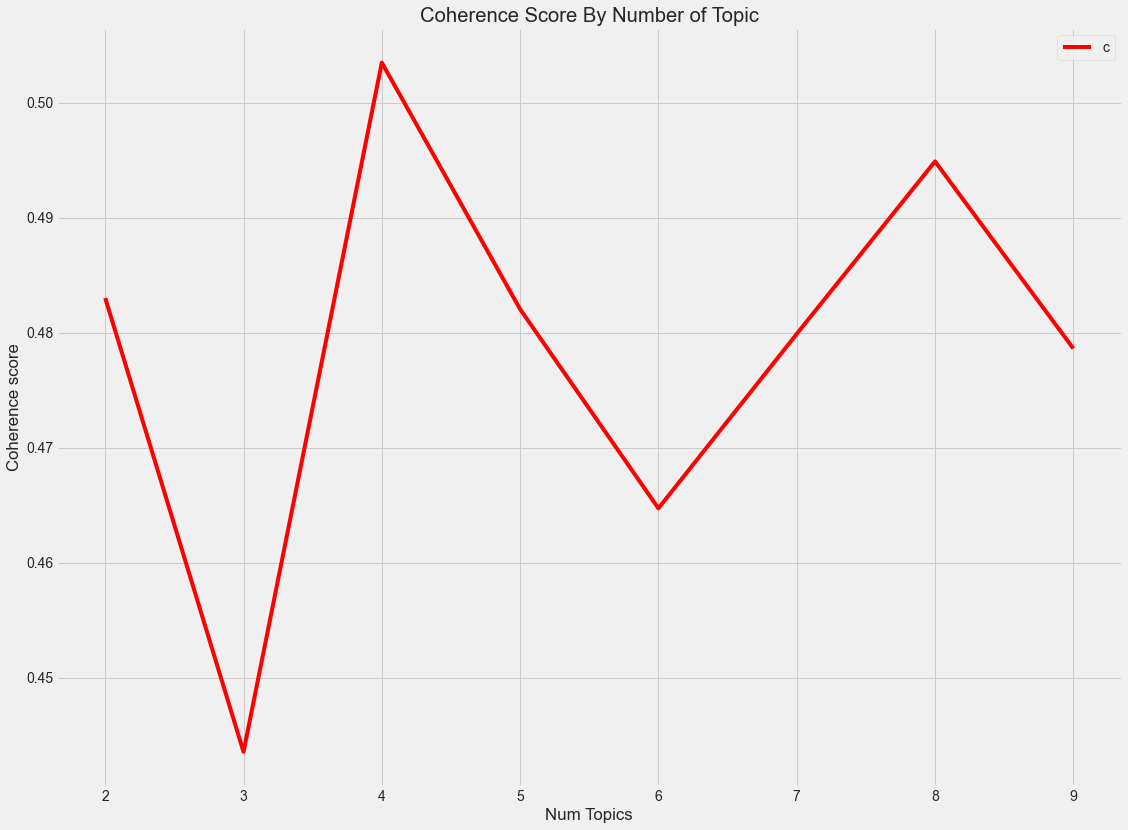

In [376]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, color = 'r')
plt.title('Coherence Score By Number of Topic')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

**Note**: 
from the optimal chart n of topic = 2 has the highest coherence score followed by 10, and 8. hence we select model with 10 topic 
and first 4 topic will be from the 10 topic considering the meaninfl output and alignment to the subject matter 

# Wordcloud of topic 


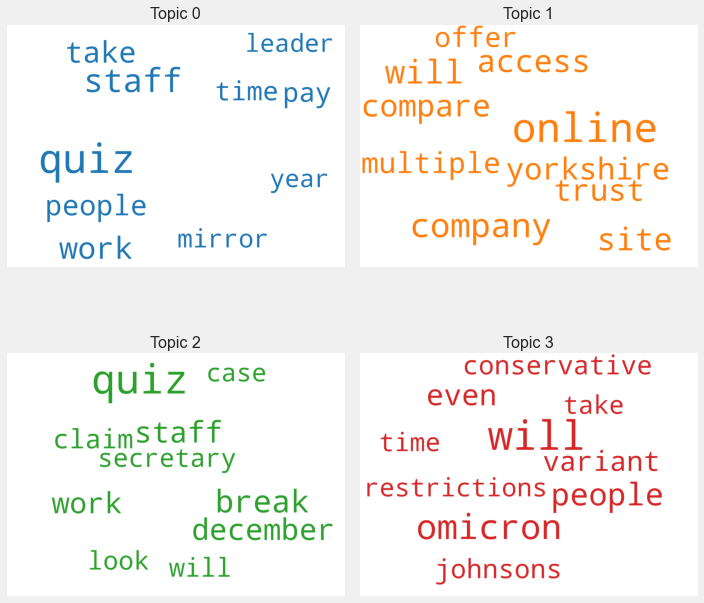

In [380]:
# 1. Wordcloud of Top N words in each topic
#important library 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

#extract colors for the graph 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

#define a word cloud
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
#extract the topic of the model, where Topic = 4 
topics = lda_model3.show_topics(formatted=False)
#create a subplot
fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
#loop through the subplot 
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #extract words from each topic
    topic_words = dict(topics[i][1]) 
    #cloud generation of words by count
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
#show plot    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


## frequency distribution

<ipython-input-345-253aee9266be>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-345-253aee9266be>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-345-253aee9266be>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-345-253aee9266be>:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



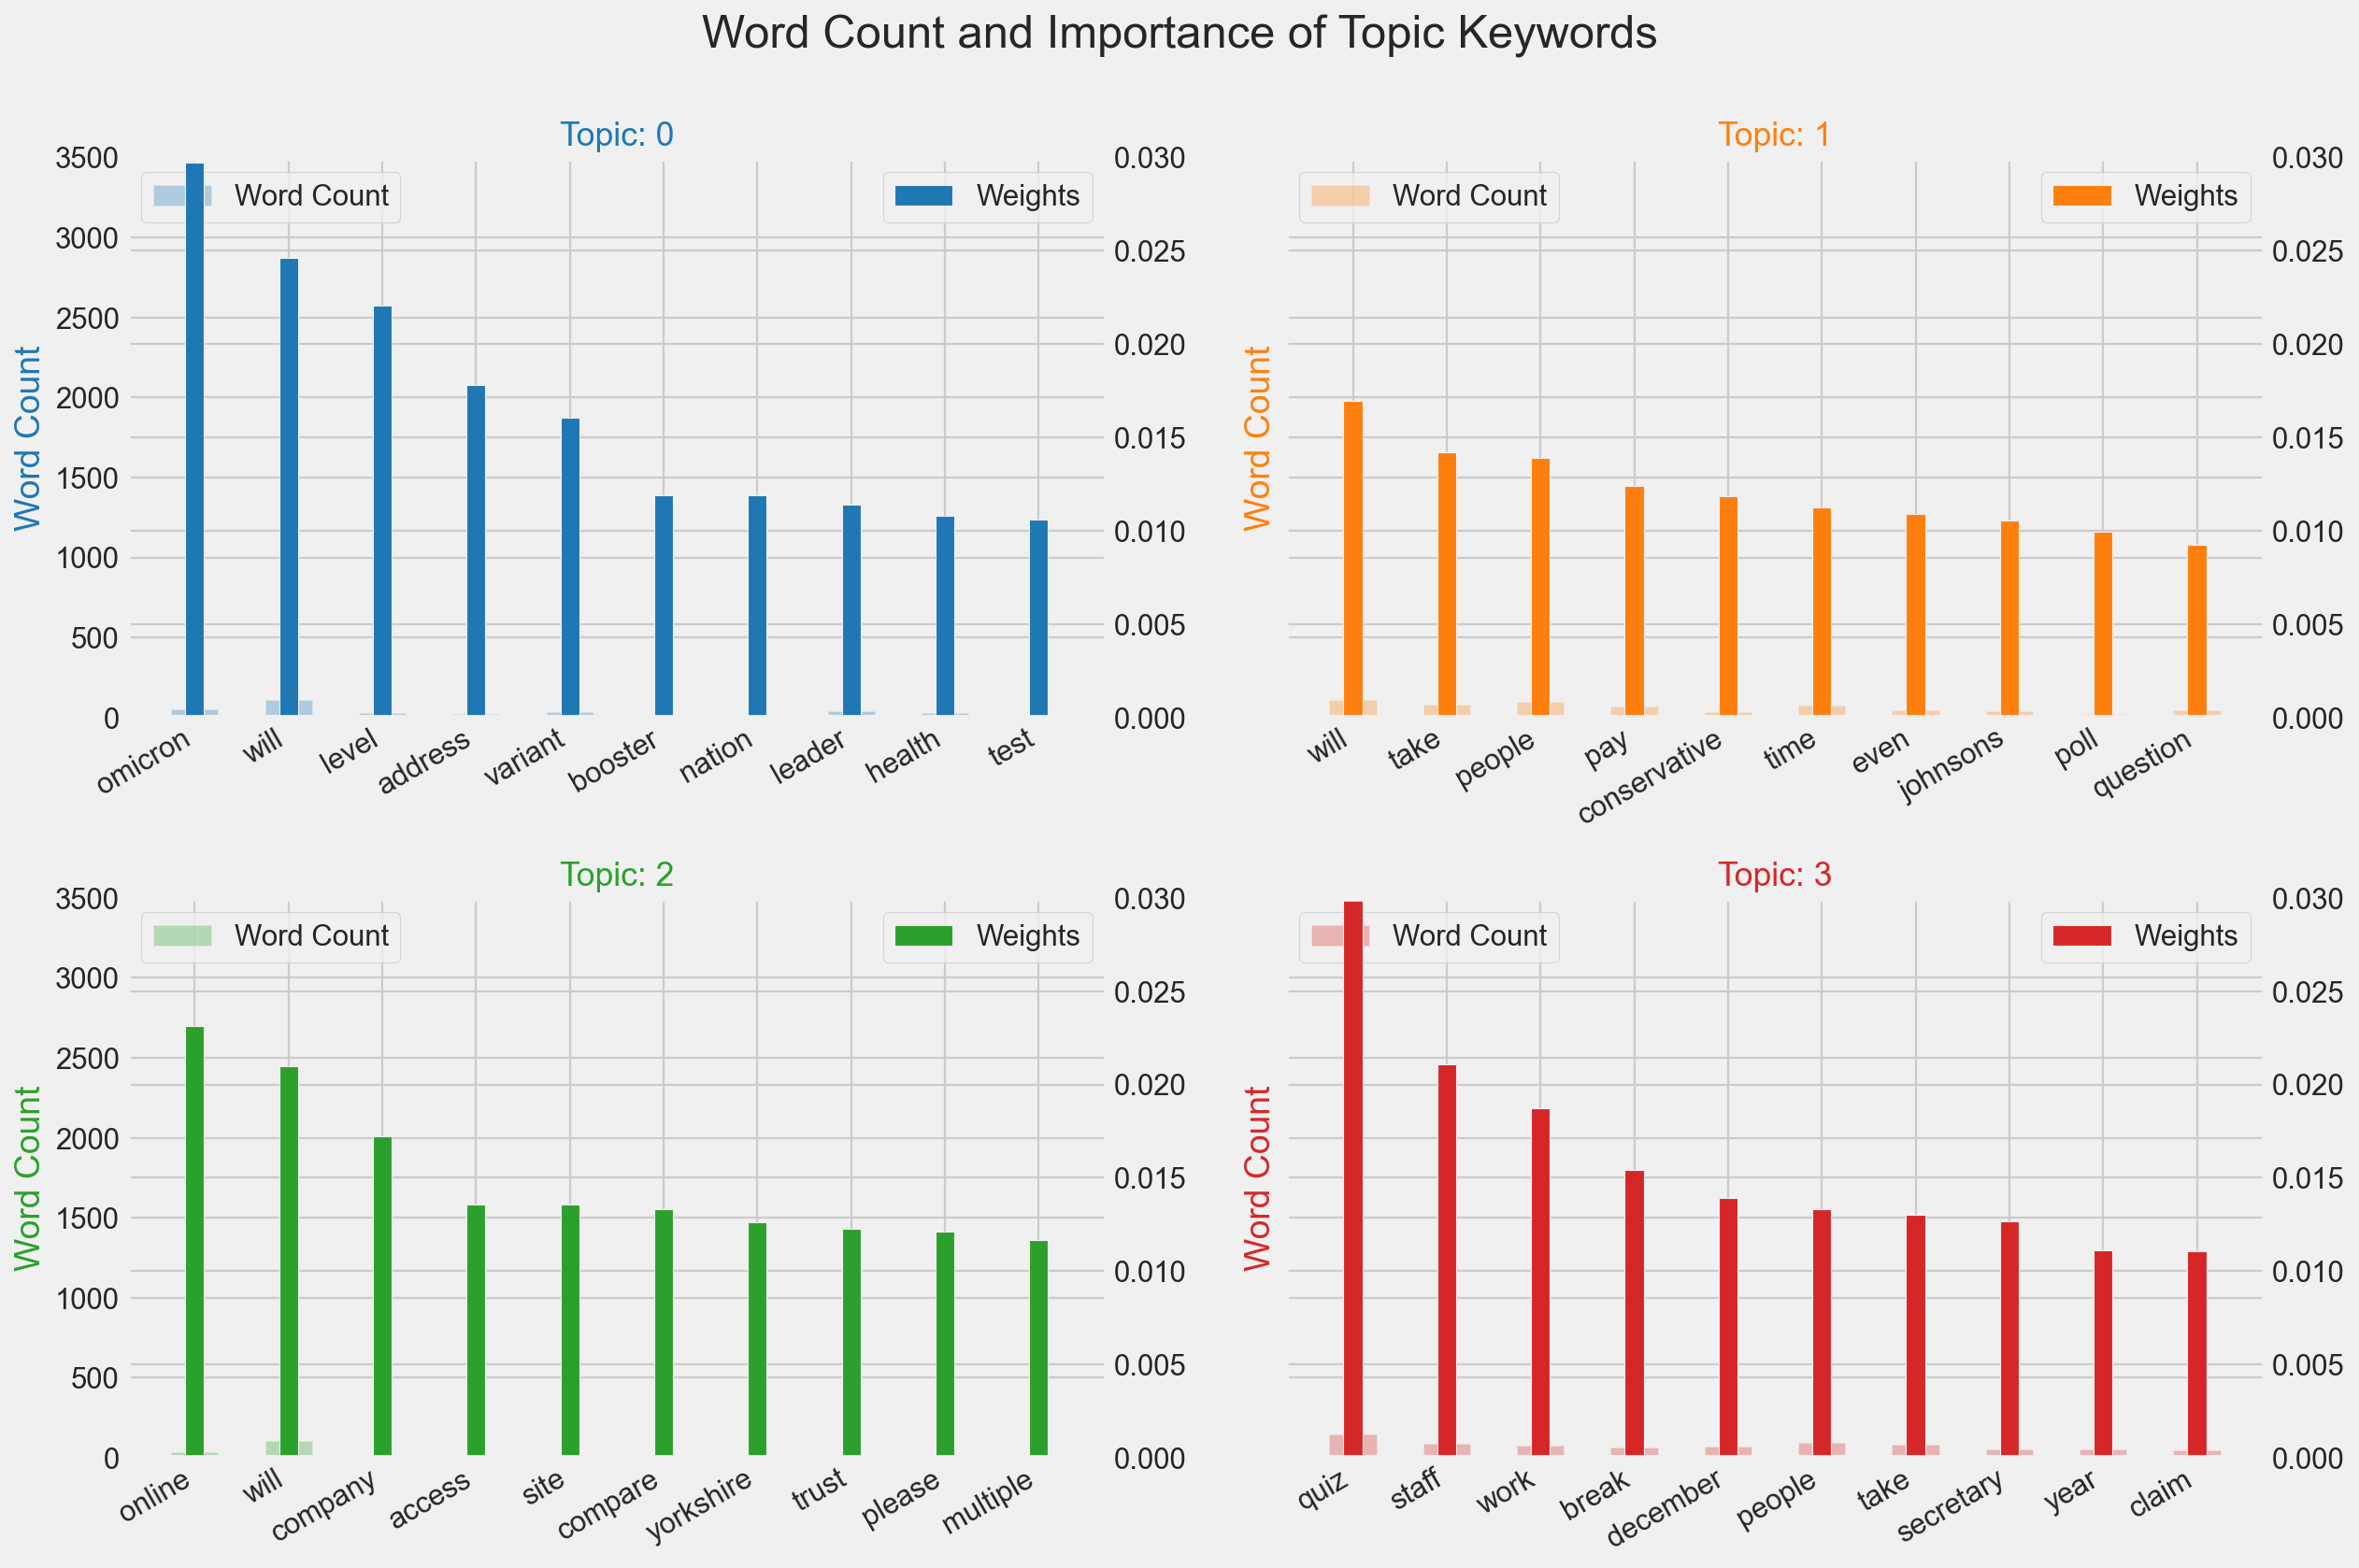

In [345]:
#Plot the word counts and the weights of keyword in a topic on the same chart
#import collection libray for count
from collections import Counter
#extract the topic by the model
topics = lda_model3.show_topics(formatted=False)
#create a list of words from the processed data set
data_flat = [w for w_list in dt for w in w_list]
counter = Counter(data_flat)
#create an empty list
out = []
#loop through the topic
for i, topic in topics:
    #extract the weight of each topic 
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
#create a data frame contain the topic id , word and the count
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
#Display the chart
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Articule Summarization

In this section one of the article was pulled out, and more deeper digging was carried out on it and also summarization of the articule was considered.

Below were the following task carried out in this section 

1. Extract a random articles new 
2. clean the corpus 
3. display the frequency count 
4. perform sentiment analysis 
5. summarize 

## Extract Article 

In [350]:
## Extract a random 
tweet_json['article'][48]

'Keir Starmer: PM appears to have broken the law by taking part in festive quiz\nBy\nUK Newsroom\n12 December 2021\nThe Prime Minister looks as though he was breaking coronavirus rules when he took part in an online Downing Street quiz with staff last December, according to Labours leader.\nSir Keir Starmer, a former director of public prosecutions, said it was very hard to see how the virtual quiz was compliant with the rules.\nThe comments come after the Sunday Mirror published a picture of Boris Johnson reportedly playing quiz master while flanked by colleagues, one of whom is draped in tinsel, in the No 10 library while London was in Tier 2 restrictions.\nDowning Street has confirmed that the Conservative Party leader had briefly taken part virtually in the quiz.\nSitting in his office are the two people who are closest working with him, no alcohol on the table, not drinking, on a Zoom call or a Teams call, a virtual call respecting the lockdown rules\nTier 2 restrictions stated th

**Note**: 
The above article by Keir Starmer was pulled out 

In [351]:
#extract the article
srt = tweet_json['article'][48]

## Cleaning Articles 

In [355]:
def clean_art (data):
    '''
    input = text articule
    purpose = clean the article(remove stop word and process it)
    output = processed words
    '''
       
    #preprocess the list of articules and remove words < 3
    process_art = simple_preprocess(data,min_len=2)
        
    #remove stopwords
    stp_art =" ".join([x for x in process_art if x not in STOPWORDS]) 
    
    return (stp_art)
#apply the function on the article text
pros_txt = clean_art(srt) 

In [356]:
pros_txt

'keir starmer pm appears broken law taking part festive quiz uk newsroom december prime minister looks though breaking coronavirus rules took part online downing street quiz staff last december according labours leader sir keir starmer former director public prosecutions said hard see virtual quiz compliant rules comments come sunday mirror published picture boris johnson reportedly playing quiz master flanked colleagues one draped tinsel library london tier restrictions downing street confirmed conservative party leader briefly taken part virtually quiz sitting office two people closest working alcohol table drinking zoom call teams call virtual call respecting lockdown rules tier restrictions stated mixing households indoors apart support bubbles maximum six people outside quiz said taken place december three days alleged rule breaking christmas party currently investigated cabinet secretary simon case official guidance time quiz set work lunches parties primarily social activity exe

## Display Frequency Count of Words in the Article

In [357]:
#Most Common Words in the Articules using counter function in collection library 
tp = Counter([word for sublist in pros_txt for word in sublist])
#convert to dataFrame 
words_art = pd.DataFrame(top.most_common(20))
#rename the columns 
words_art.columns = ['Common_words','count']
#display the table using colored background 
words_art.style.background_gradient(cmap='Reds')

,Common_words,count
0,say,213
1,johnson,209
2,pay,196
3,minister,170
4,street,150
5,prime,149
6,quiz,148
7,down,143
8,boris,128
9,rule,118


In [361]:
#Tree Map of top 20 words in the article 
fig = px.treemap(words_art, path=['Common_words'], values='count',title='Tree of Most Words in Article - Top 20')
fig.show()

In [364]:
words_art1 = words_art.sort_values(by = 'count', ascending = 'True')
fig = px.bar(words_art1, x="count", y="Common_words", title='Most Frequently Words in Articles - Top 20', orientation='h', 
             width=700, height=700,color='count', color_continuous_scale='Rainbow')
fig.show()

## Summary of Articles 

In [366]:
#Download the Article
from newspaper import Article
url = "https://www.newschainonline.com/news/prime-minister-quiz-lockdown-breach-keir-starmer-241759"
article = Article(url)
article.download()

In [367]:
#display the author
article.parse()
article.authors

[]

In [368]:
#article date 
article.publish_date

datetime.datetime(2021, 12, 12, 12, 24, 12, tzinfo=tzutc())

In [369]:
#print the summary of the article
#nltk.download('punkt')
article.nlp()
print (f'Summary: {article.summary}')

Summary: The Prime Minister “looks as though he was” breaking coronavirus rules when he took part in an online Downing Street quiz with staff last December, according to Labour’s leader.
Sir Keir Starmer, a former director of public prosecutions, said it was “very hard” to see how the virtual quiz was “compliant with the rules”.
Sir Keir, asked on the BBC’s The Andrew Marr Show whether the Prime Minister had been breaking the law at the time the picture was taken, said: “Well, it looks as though he was.
Opposition leader Sir Keir stopped short of calling for Mr Johnson to resign over his participation in the event.
A No 10 spokeswoman said: “This was a virtual quiz.


In [370]:
Summary = article.summary

In [371]:
#display the summary 
print(Summary)

The Prime Minister “looks as though he was” breaking coronavirus rules when he took part in an online Downing Street quiz with staff last December, according to Labour’s leader.
Sir Keir Starmer, a former director of public prosecutions, said it was “very hard” to see how the virtual quiz was “compliant with the rules”.
Sir Keir, asked on the BBC’s The Andrew Marr Show whether the Prime Minister had been breaking the law at the time the picture was taken, said: “Well, it looks as though he was.
Opposition leader Sir Keir stopped short of calling for Mr Johnson to resign over his participation in the event.
A No 10 spokeswoman said: “This was a virtual quiz.


In [373]:
print(f'The Lenght Text: {len(srt)}');
print(f'The Lenght Summary:{len(Summary)}' )

The Lenght Text: 5333
The Lenght Summary:665
